In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)

In [2]:
train = dd.read_csv('datasets/train.csv', blocksize=25e6, assume_missing=True)

In [3]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

# 特徵分布

<AxesSubplot:title={'center':'click distribution'}, xlabel='click', ylabel='count'>

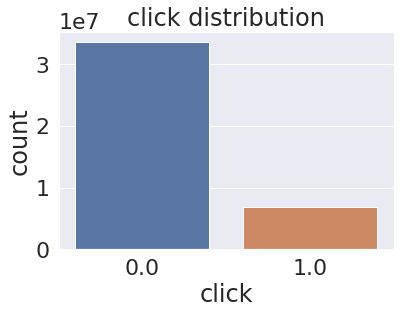

In [4]:
plt.title('click distribution')
sns.countplot(train.click.compute())

In [5]:
train.click.value_counts().compute()

0.0    33563901
1.0     6865066
Name: click, dtype: int64

# 網站類(site_id, site_domain, site_category)

### site_category 分五類 50e219e0, f028772b, 28905ebd, 3e814130, other
### site_domain 低於頻率平均數(5220.xx)的為一類 共234類

In [6]:
train.site_id.nunique().compute()

4737

In [7]:
train.groupby(['site_id', 'click']).size().to_frame().compute()

0
site_id  click      
00255fb4 0.0     394
006ab81e 0.0     257
         1.0      23
00f648b7 0.0     949
011e5414 0.0    1159
...              ...
d13ee621 1.0       1
2b8e96f4 0.0       1
82b4318e 0.0       1
aaca6ef0 1.0       1
efca7c44 0.0       1

[8050 rows x 1 columns]

In [8]:
train.site_domain.nunique().compute()

7745

In [9]:
train.groupby(['site_domain', 'click']).size().to_frame().compute()

0
site_domain click      
005b495a    0.0    1941
            1.0    1088
00e1b9c0    0.0    1361
            1.0    2081
0150cc3e    0.0    6330
...                 ...
a9573633    0.0       1
6e5c932a    0.0       1
9fbed9c1    0.0       1
d761e9fb    0.0       1
e05edb43    0.0       1

[11829 rows x 1 columns]

In [10]:
train.site_category.nunique().compute()

26

<AxesSubplot:title={'center':'site_category category & click distribution'}, xlabel='site_category', ylabel='count'>

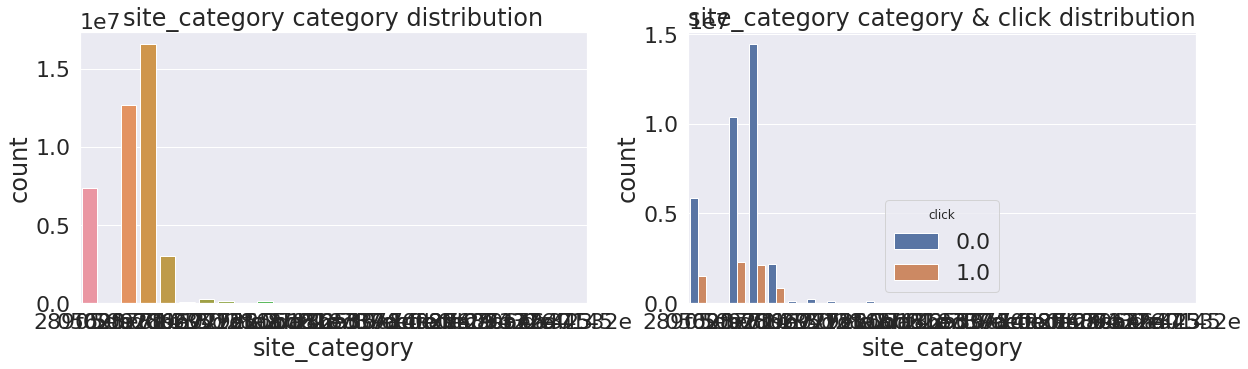

In [11]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('site_category category distribution')
sns.countplot(train.site_category.compute())

plt.subplot(1, 2, 2)
plt.title('site_category category & click distribution')
sns.countplot(x='site_category', hue='click', data=train.compute())

In [12]:
train.groupby(['site_category']).size().to_frame('size').compute().sort_values(by=['size'], ascending=False) # 前四類廣告數量最多

,size
site_category,
50e219e0,16537234
f028772b,12657073
28905ebd,7377208
3e814130,3050306
f66779e6,252451
75fa27f6,160985
335d28a8,136463
76b2941d,104754
c0dd3be3,42090


In [13]:
train.site_id.value_counts().to_frame().compute()

,site_id
85f751fd,14596137
1fbe01fe,6486150
e151e245,2637747
d9750ee7,963745
5b08c53b,913325
...,...
c80dedf8,1
80fe6d36,1
f6c448a8,1
f6c4579a,1


In [14]:
train.site_id.value_counts().value_counts().to_frame().compute().sort_index() # site_id 出現次數統計

,site_id
1,567
2,270
3,204
4,133
5,112
...,...
913325,1
963745,1
2637747,1
6486150,1


In [15]:
train.site_domain.value_counts().compute() # c4e18dd6 最多

c4e18dd6    15131739
f3845767     6486150
7e091613     3325008
7687a86e     1290165
98572c79      996816
              ...   
6391417e           1
a19266a6           1
2a551abd           1
63b26a25           1
7d7a0e49           1
Name: site_domain, Length: 7745, dtype: int64

In [16]:
train.site_domain.value_counts().compute().mean()

5220.008650742415

In [17]:
train.site_domain.value_counts().value_counts().to_frame().compute().sort_index() # site_domain 出現次數統計

,site_domain
1,1942
2,776
3,414
4,289
5,221
...,...
996816,1
1290165,1
3325008,1
6486150,1


In [18]:
train.site_category.value_counts().compute()

50e219e0    16537234
f028772b    12657073
28905ebd     7377208
3e814130     3050306
f66779e6      252451
75fa27f6      160985
335d28a8      136463
76b2941d      104754
c0dd3be3       42090
72722551       28216
dedf689d       24500
70fb0e29       24224
0569f928       17106
8fd0aea4        7482
a818d37a        3230
42a36e14        2515
e787de0e        1209
bcf865d9        1045
5378d028         483
9ccfa2ea         318
c706e647          28
da34532e          23
74073276          14
110ab22d           6
6432c423           2
a72a0145           2
Name: site_category, dtype: int64

In [19]:
train.site_category.value_counts().value_counts().to_frame().compute().sort_index() # site_category 出現次數統計

,site_category
2,2
6,1
14,1
23,1
28,1
318,1
483,1
1045,1
1209,1
2515,1


# 應用程式類(app_id, app_domain, app_category)

### app_category 平均數(1123026.xx)以下為一類, 總共6類
### app_domain 低於頻率平均數(72323.xx)的為一類 共 15 類

In [20]:
train.app_id.nunique().compute()

8552

In [21]:
train.groupby(['app_id', 'click']).size().to_frame().compute()

0
app_id   click     
000d6291 0.0    178
003def94 0.0    204
00848fac 0.0    268
         1.0      8
013d2249 0.0    608
...             ...
03e09b02 0.0      1
44d70967 0.0      1
85e54472 0.0      1
b2d4c5d5 1.0      1
f6c2f1c3 1.0      1

[12945 rows x 1 columns]

In [22]:
train.app_id.value_counts().value_counts().to_frame().compute().sort_index()# app_id 出現次數統計

,app_id
1,1634
2,849
3,589
4,415
5,295
...,...
757812,1
759098,1
1129016,1
1555283,1


In [23]:
train.app_domain.nunique().compute()

559

In [24]:
train.app_domain.value_counts().compute()

7801e8d9    27237087
2347f47a     5240885
ae637522     1881838
5c5a694b     1129228
82e27996      759125
              ...   
741bb270           1
7366e108           1
721ddffd           1
70146488           1
001b87ae           1
Name: app_domain, Length: 559, dtype: int64

In [25]:
app_domain = train.app_domain.value_counts().compute()
app_domain[app_domain.values>app_domain.mean()].count()

14

In [26]:
train.app_domain.value_counts().compute().mean()

72323.73345259392

In [27]:
train.app_domain.value_counts().value_counts().to_frame().compute().sort_index() # app_domain 出現次數統計

,app_domain
1,131
2,66
3,34
4,22
5,12
...,...
759125,1
1129228,1
1881838,1
5240885,1


In [28]:
train.groupby(['app_domain', 'click']).size().to_frame().compute()

0
app_domain click       
0654b444   0.0    18619
           1.0     4679
0b7d3d7d   0.0      232
15c23f8e   0.0      975
15ec7f39   0.0    12838
...                 ...
911c0d17   0.0        1
5397e464   0.0        2
fea0d84a   1.0        1
7366e108   0.0        1
70146488   0.0        1

[822 rows x 1 columns]

In [29]:
train.app_category.value_counts().compute()

07d7df22    26165592
0f2161f8     9561058
cef3e649     1731545
8ded1f7a     1467257
f95efa07     1141673
d1327cf5      123233
09481d60       54886
dc97ec06       54644
75d80bbe       40108
fc6fa53d       23663
4ce2e9fc       20762
879c24eb       12785
a3c42688       11121
4681bb9d        6291
0f9a328c        5584
a86a3e89        2497
2281a340        2243
8df2e842        1679
79f0b860         605
0bfbc358         425
a7fd01ec         362
7113d72a         304
2fc4f2aa         234
18b1e0be         212
5326cf99         133
0d82db25          25
4b7ade46          16
bf8ac856           9
bd41f328           6
71af18ce           5
86c1a5a3           3
6fea3693           2
ef03ae90           2
52de74cf           1
cba0e20d           1
f395a87f           1
Name: app_category, dtype: int64

In [30]:
train.app_category.value_counts().compute().mean()

1123026.861111111

In [31]:
train.app_category.value_counts().value_counts().to_frame().compute().sort_index() # app_category 出現次數統計

,app_category
1,3
2,2
3,1
5,1
6,1
9,1
16,1
25,1
133,1
212,1


In [32]:
train.app_category.value_counts().value_counts().to_frame().compute() # app_category 出現次數統計

,app_category
1,3
2,2
1679,1
3,1
5,1
6,1
9,1
16,1
25,1
133,1


<AxesSubplot:title={'center':'app_category category & click distribution'}, xlabel='app_category', ylabel='count'>

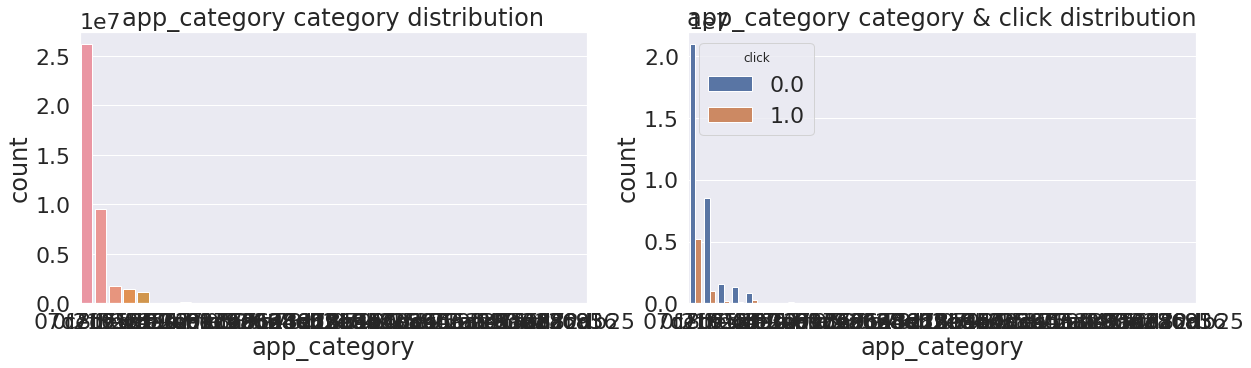

In [33]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('app_category category distribution')
sns.countplot(train.app_category.compute())

plt.subplot(1, 2, 2)
plt.title('app_category category & click distribution')
sns.countplot(x='app_category', hue='click', data=train.compute())

In [34]:
train.app_id.value_counts().compute() # ecad2386

ecad2386    25832830
92f5800b     1555283
e2fcccd2     1129016
febd1138      759098
9c13b419      757812
              ...   
4e79c4a1           1
4e26dfaa           1
4e16bda2           1
cfd5f8f6           1
7f3af1a6           1
Name: app_id, Length: 8552, dtype: int64

In [35]:
train.app_domain.value_counts().compute() # 7801e8d9

7801e8d9    27237087
2347f47a     5240885
ae637522     1881838
5c5a694b     1129228
82e27996      759125
              ...   
741bb270           1
7366e108           1
721ddffd           1
70146488           1
001b87ae           1
Name: app_domain, Length: 559, dtype: int64

In [36]:
train.app_category.value_counts().compute() # 07d7df22

07d7df22    26165592
0f2161f8     9561058
cef3e649     1731545
8ded1f7a     1467257
f95efa07     1141673
d1327cf5      123233
09481d60       54886
dc97ec06       54644
75d80bbe       40108
fc6fa53d       23663
4ce2e9fc       20762
879c24eb       12785
a3c42688       11121
4681bb9d        6291
0f9a328c        5584
a86a3e89        2497
2281a340        2243
8df2e842        1679
79f0b860         605
0bfbc358         425
a7fd01ec         362
7113d72a         304
2fc4f2aa         234
18b1e0be         212
5326cf99         133
0d82db25          25
4b7ade46          16
bf8ac856           9
bd41f328           6
71af18ce           5
86c1a5a3           3
6fea3693           2
ef03ae90           2
52de74cf           1
cba0e20d           1
f395a87f           1
Name: app_category, dtype: int64

# 裝置類(device_id, device_ip, device_model, device_type, device_conn_type)

### device_id 分兩類 a99f214a, other
### device_ip 以頻率之平均數當二元分類的切點
### device_model 頻率100000以下為一類共71類

In [37]:
train.device_id.nunique().compute()

2686408

In [38]:
train.device_id.value_counts().to_frame().compute()

,device_id
a99f214a,33358308
0f7c61dc,21356
c357dbff,19667
936e92fb,13712
afeffc18,9654
...,...
97300066,1
973003d9,1
97300bbd,1
97300d46,1


In [40]:
train.device_ip.value_counts().compute()

6b9769f2    208701
431b3174    135322
2f323f36     88499
af9205f9     87844
930ec31d     86996
             ...  
8dbdde0a         1
8dbdddef         1
8dbddd13         1
8dbdd397         1
0000016d         1
Name: device_ip, Length: 6729486, dtype: int64

## 特別注意低頻率特別的多，需要另外處理特徵，以頻率之平均數當二元分類的切點

In [41]:
train.device_ip.value_counts().value_counts().to_frame().compute().sort_index().mean() # device_ip 出現次數統計

device_ip    3250.95942
dtype: float64

In [42]:
train.device_model.nunique().compute()

8251

In [43]:
device_model = train.device_model.value_counts().compute()

In [44]:
train.device_model.value_counts().compute()

8a4875bd    2455470
1f0bc64f    1424546
d787e91b    1405169
76dc4769     767961
be6db1d7     742913
             ...   
b62eb740          1
b6197176          1
496f3bd2          1
497de5b5          1
fffc15b0          1
Name: device_model, Length: 8251, dtype: int64

In [45]:
train.device_model.value_counts().value_counts().to_frame().compute().sort_index() # device_model 出現次數統計

,device_model
1,810
2,389
3,260
4,201
5,174
...,...
742913,1
767961,1
1405169,1
1424546,1


In [46]:
device_model[device_model.values>100000].count()

70

In [47]:
train.groupby(['device_model', 'click']).size().to_frame().compute()

0
device_model click       
00097428     0.0     1779
             1.0      543
0009f4d7     0.0     4309
00b08597     0.0     9276
00b1f3a7     0.0    72720
...                   ...
50d70abf     0.0        1
6a4bdb66     0.0        1
75bad11d     1.0        1
8f8389fc     1.0        2
f8ab55bd     1.0        1

[14624 rows x 1 columns]

<AxesSubplot:title={'center':'device_type category & click distribution'}, xlabel='device_type', ylabel='count'>

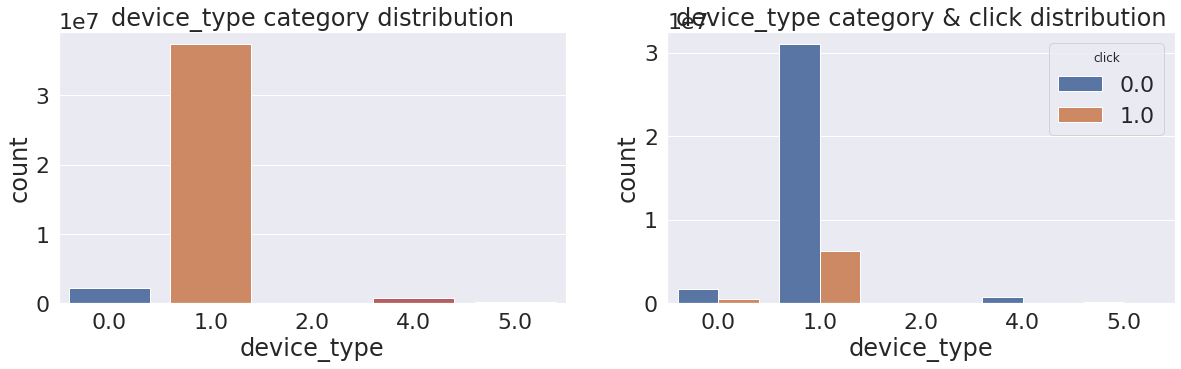

In [48]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('device_type category distribution')
sns.countplot(train.device_type.compute())

plt.subplot(1, 2, 2)
plt.title('device_type category & click distribution')
sns.countplot(x='device_type', hue='click', data=train.compute())

<AxesSubplot:title={'center':'device_conn_type category & click distribution'}, xlabel='device_conn_type', ylabel='count'>

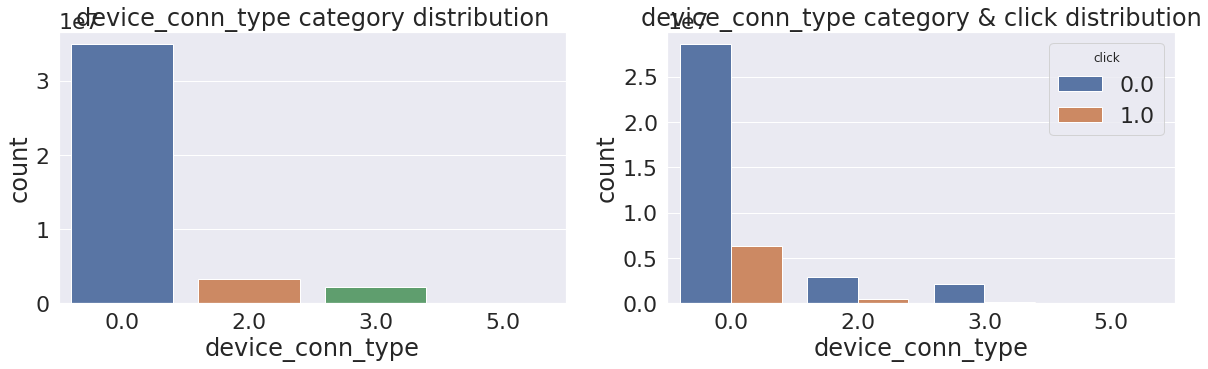

In [49]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('device_conn_type category distribution')
sns.countplot(train.device_conn_type.compute())

plt.subplot(1, 2, 2)
plt.title('device_conn_type category & click distribution')
sns.countplot(x='device_conn_type', hue='click', data=train.compute())

In [50]:
train.device_type.value_counts().compute()

1.0    37304667
0.0     2220812
4.0      774272
5.0      129185
2.0          31
Name: device_type, dtype: int64

In [51]:
train.device_conn_type.value_counts().compute()

0.0    34886838
2.0     3317443
3.0     2181796
5.0       42890
Name: device_conn_type, dtype: int64

# 廣告版位分類
### 1.banner_pos 分三類 0, 1, other

<AxesSubplot:title={'center':'banner_pos category & click distribution'}, xlabel='banner_pos', ylabel='count'>

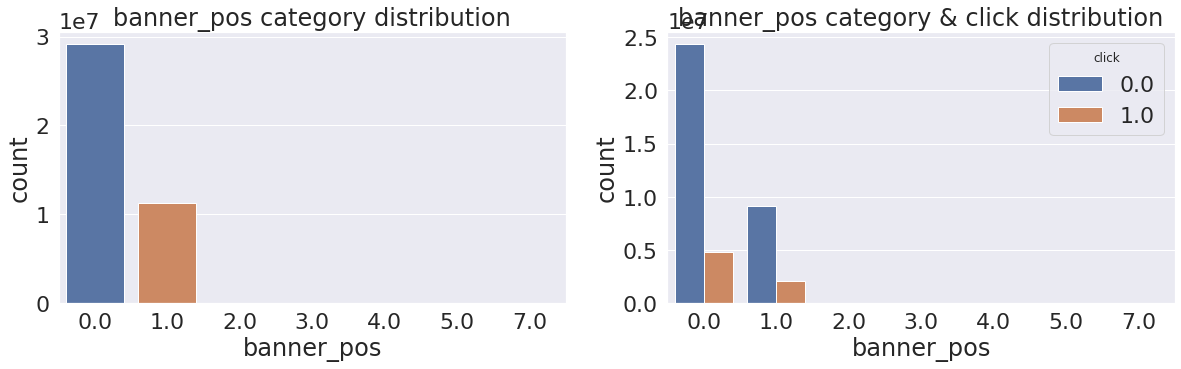

In [52]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('banner_pos category distribution')
sns.countplot(train.banner_pos.compute())

plt.subplot(1, 2, 2)
plt.title('banner_pos category & click distribution')
sns.countplot(x='banner_pos', hue='click', data=train.compute())

In [53]:
train.banner_pos.value_counts().compute()

0.0    29109590
1.0    11247282
7.0       43577
2.0       13001
4.0        7704
5.0        5778
3.0        2035
Name: banner_pos, dtype: int64

# Heat Map
### 1. C1, device_type 相關性高
### 2. C14, C17 相關性高
### 3. C16 與click 相關係數最高



<AxesSubplot:>

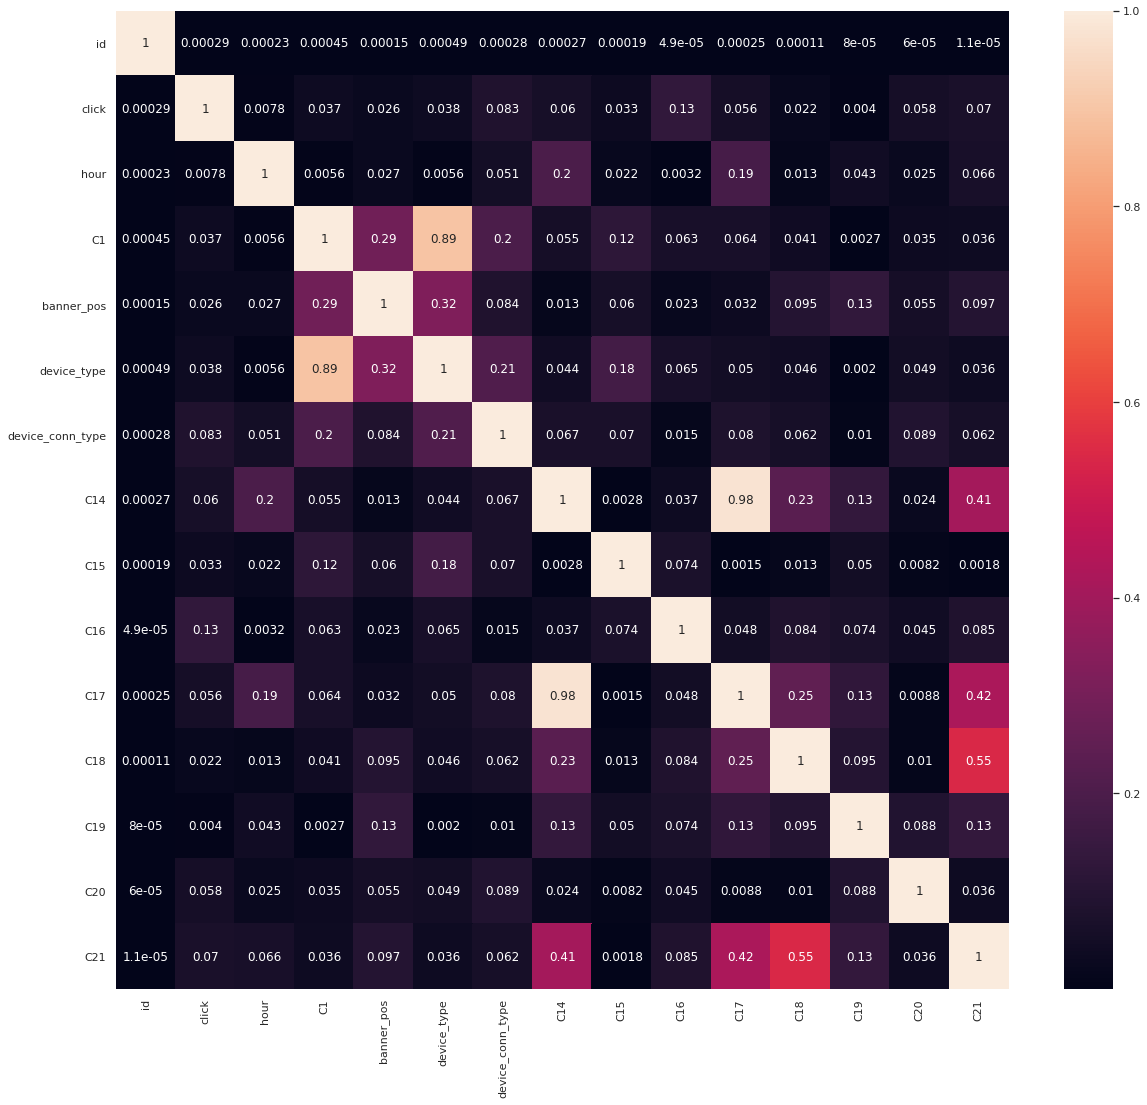

In [54]:
sns.set(font_scale=1)
plt.figure(figsize=(20, 18))
sns.heatmap(train.corr().abs().compute(), annot=True)

# Hour

In [55]:
train['day'] = (train.hour % 10000 / 100).round()
train['hour1'] = (train.hour % 100).round(2)

<AxesSubplot:title={'center':'day distribution'}, xlabel='day', ylabel='count'>

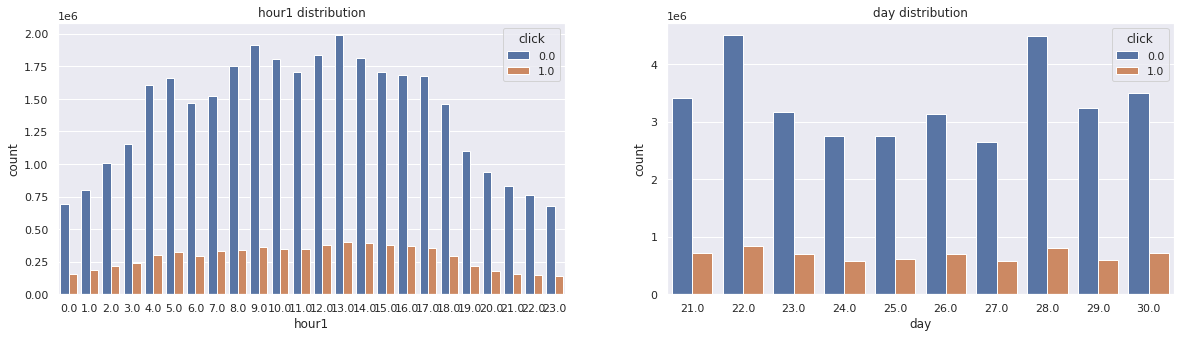

In [56]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('hour1 distribution')
sns.countplot(x="hour1", hue="click",data=train.compute())

plt.subplot(1, 2, 2)
plt.title('day distribution')
sns.countplot(x="day", hue="click",data=train.compute())

# 網站類(site_id, site_domain, site_category)

### site_category 分五類 50e219e0, f028772b, 28905ebd, 3e814130, other
### site_domain 低於頻率平均數(5220.xx)的為一類 共234類

# 應用程式類(app_id, app_domain, app_category)

### app_category 平均數(1123026.xx)以下為一類, 總共6類
### app_domain 低於頻率平均數(72323.xx)的為一類 共 15 類

# 裝置類(device_id, device_ip, device_model, device_type, device_conn_type)

### device_id 分兩類 a99f214a, other
### device_ip 以頻率之平均數當二元分類的切點
### device_model 頻率100000以下為一類共71類

# 廣告版位分類
### 1.banner_pos 分三類 0, 1, other

In [ ]:
train['new_site_category'] = train['site_category'].where(~train['site_category'].isin(['50e219e0', 'f028772b', '28905ebd', '3e814130']), "other")

In [ ]:
site_domain_value_counts = train.site_domain.value_counts().compute()

train['new_site_domain'] = train['site_domain'].where(~train['site_domain'].isin(site_domain_value_counts[site_domain_value_counts.values < site_domain_value_counts.mean()].index), "other")

In [ ]:
app_category_value_counts = train.app_category.value_counts().compute()

train['new_app_category'] = train['app_category'].where(~train['app_category'].isin(app_category_value_counts[app_category_value_counts.values < app_category_value_counts.mean()].index), "other")

In [ ]:
app_domain_value_counts = train.app_domain.value_counts().compute()

train['new_app_domain'] = train['app_domain'].where(~train['app_domain'].isin(app_domain_value_counts[app_domain_value_counts.values < app_domain_value_counts.mean()].index), "other")

In [ ]:
train['new_device_id'] = train['device_id'].where(~train['device_id'].isin(['a99f214a']), "other")

In [ ]:
device_ip_value_counts = train.device_ip.value_counts().compute()

train['new_device_ip'] = train['device_ip'].where(~train['device_ip'].isin(device_ip_value_counts[device_ip_value_counts.values < device_ip_value_counts.mean()].index), 0)
train['new_device_ip'] = train['device_ip'].where(~train['device_ip'].isin(device_ip_value_counts[device_ip_value_counts.values > device_ip_value_counts.mean()].index), 1)

In [ ]:
device_model_value_counts = train.device_model.value_counts().compute()

train['new_device_model'] = train['device_model'].where(~train['device_model'].isin(device_model_value_counts[device_model_value_counts.values < 1e5].index), "other")

In [ ]:
train['new_banner_pos'] = train['banner_pos'].where(~train['banner_pos'].isin([0, 1]), "other")

In [ ]:
feature_list = [
    'id', 'click', 'C1', 'site_id', 'app_id', 'device_type', 'device_conn_type',
    'C14', 'C15', 'C16', 'C17', 'C18', 'C20', 'C21', 'day', 'hour1',
    'new_site_category', 'new_site_domain', 'new_app_category', 'new_app_domain',
    'new_device_id', 'new_device_ip', 'new_device_model', 'new_banner_pos'
]

In [ ]:
train_process = train[feature_list]